# Predict whether a patient has a low or high chance of having a heart attack using classificationIn this project, I used collected data on nearly 300 patients.
dataset have 14 column which each of them describes a specific feature, I will explain the one's that is not clear by it's names:
- exang: Is it pain start with special activity?
    - 0 means no
    - 1 means yes
- caa: The number of main vessels
      - A value between 0 and 3
- cp: Type of chest pain
      - Value 1: Direct heart pain
      - Value 2: Indirect pain that leads to feeling pain in the heart
      - Value 3: Non-cardiac pain
      - Value 4: Without symptoms
- trtbps: Resting blood pressure 
- chol: Cholesterol
- fbs: High fasting blood sugar - diabetes
      - Value 1: Possitive
      - Value 0: Negetive
- restecg: ECG results at rest
      - Value 0: Normal
      - Value 1: The ST segment of the ECG is abnormal
      - Value 2: Probably or definitely the left ventricle is large

- thalach Maximum heart rate:


## Library 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import jaccard_score
import itertools
%matplotlib inline

## Read an load data from CSV and visualization

In [9]:
df = pd.read_csv('heart.csv')
df[0:5]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

<Axes: >

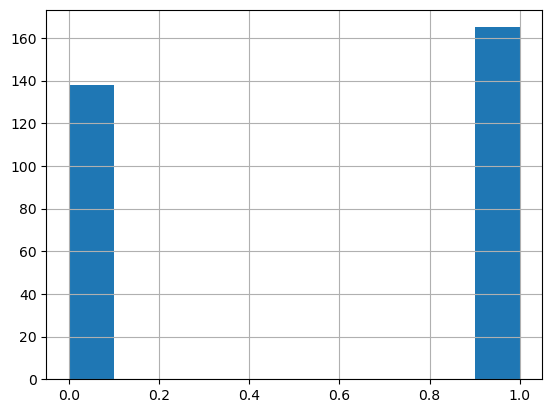

In [9]:
df['output'].hist()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

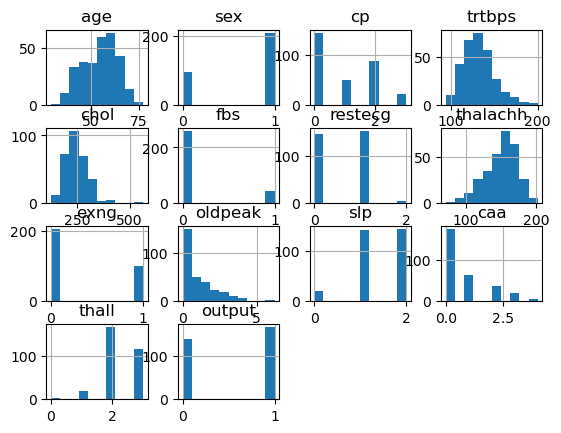

In [12]:
df.hist()

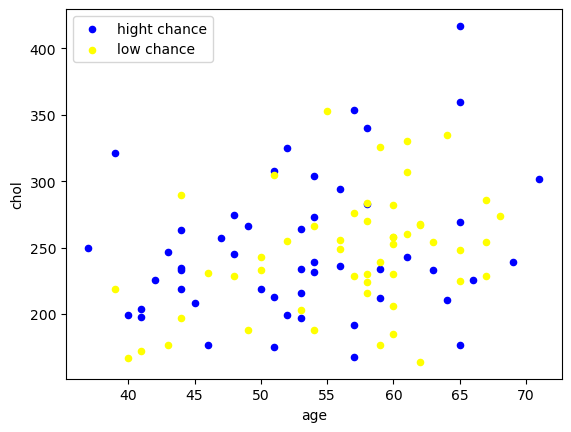

In [5]:
ax = df[df['output'] == 1][0:50].plot(kind = 'scatter', x = 'age', y = 'chol', color = 'blue', label = 'hight chance')
df[df['output'] == 0][0:50].plot(kind = 'scatter', x = 'age', y = 'chol', color = 'Yellow', label = 'low chance', ax = ax )
plt.show()

## Data pre-processing and data selection

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [17]:
X = np.asarray(df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values)
X[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [18]:
Y = np.asarray(df['output'].values)
Y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Train/test dataset

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


## Models

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### SVM

In kernelling: rbf
Jaccard Score is: 0.6078431372549019
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        25
           1       0.67      0.86      0.76        36

    accuracy                           0.67        61
   macro avg       0.67      0.63      0.63        61
weighted avg       0.67      0.67      0.65        61

Confusion matrix, without normalization
[[10 15]
 [ 5 31]]
In kernelling: poly
Jaccard Score is: 0.6382978723404256
              precision    recall  f1-score   support

           0       0.70      0.56      0.62        25
           1       0.73      0.83      0.78        36

    accuracy                           0.72        61
   macro avg       0.72      0.70      0.70        61
weighted avg       0.72      0.72      0.71        61

Confusion matrix, without normalization
[[14 11]
 [ 6 30]]
In kernelling: sigmoid
Jaccard Score is: 0.5901639344262295
              precision    recall  f1-score   support



F:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In kernelling: linear
Jaccard Score is: 0.8717948717948718
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61

Confusion matrix, without normalization
[[22  3]
 [ 2 34]]


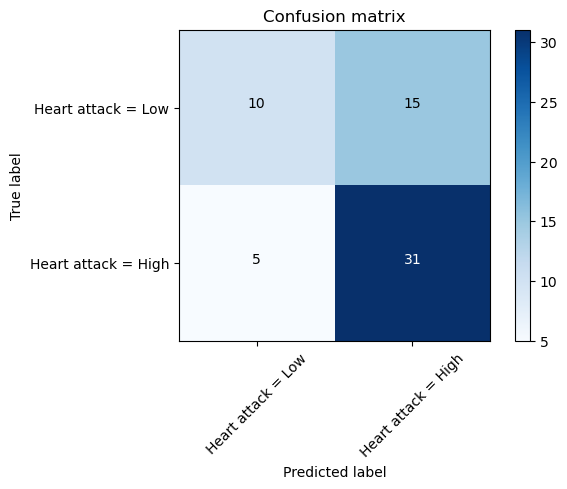

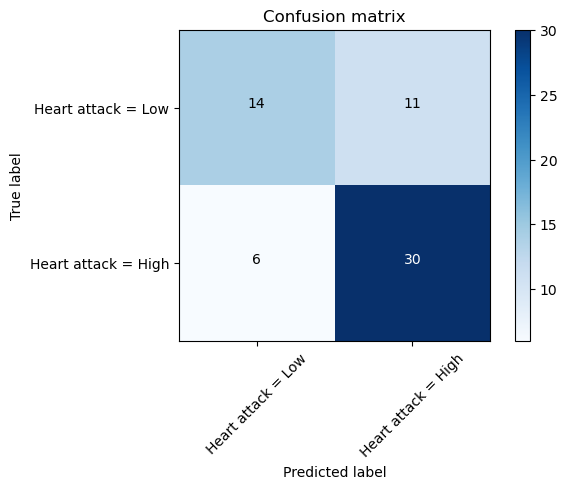

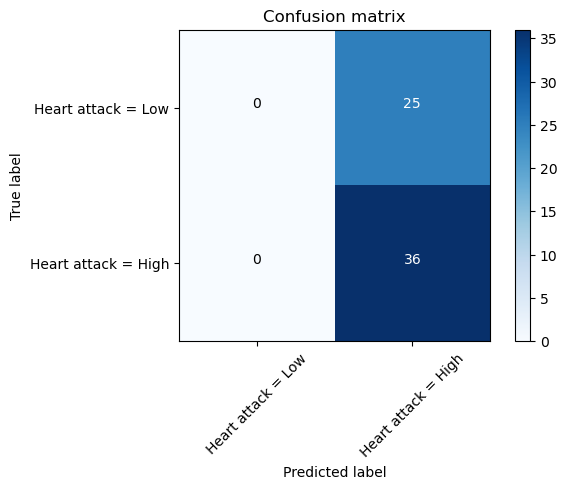

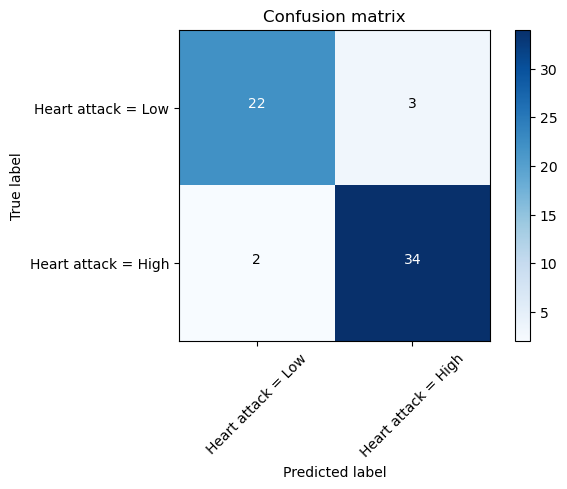

In [65]:
from sklearn import svm
kernels = ['rbf','poly','sigmoid','linear']
#print('Real Y_test is:', Y_test[0:5])
for kernel in kernels:
    clf = svm.SVC(kernel = kernel)
    # Train
    clf.fit(X_train, Y_train)
    # Predict
    yhat = clf.predict(X_test)
    # Evaluation
    #print(kernel, '==>', yhat[0:5])
    print('In kernelling:', kernel)
    cnf_matrix = confusion_matrix(Y_test, yhat, labels = [0,1])
    np.set_printoptions(precision = 2)
    print('Jaccard Score is:',jaccard_score(Y_test, yhat, pos_label = 1))
    print(classification_report(Y_test, yhat))
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Heart attack = Low', 'Heart attack = High'], normalize = False, title='Confusion matrix')

As you can see the best result appears when our kernelling method between rbf,poly,sigmoind,linear is linear in SVM .

### Logistic regression

F:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1 0 1 1 1]
Solver method: lbfgs
              precision    recall  f1-score   support

           0       0.89      0.68      0.77        25
           1       0.81      0.94      0.87        36

    accuracy                           0.84        61
   macro avg       0.85      0.81      0.82        61
weighted avg       0.84      0.84      0.83        61

Jaccard Score is: 0.6296296296296297
Confusion matrix, without normalization
[[34  2]
 [ 8 17]]
[1 0 1 1 1]
Solver method: liblinear
              precision    recall  f1-score   support

           0       0.89      0.64      0.74        25
           1       0.79      0.94      0.86        36

    accuracy                           0.82        61
   macro avg       0.84      0.79      0.80        61
weighted avg       0.83      0.82      0.81        61

Jaccard Score is: 0.5925925925925926
Confusion matrix, without normalization
[[34  2]
 [ 9 16]]
[1 0 1 1 1]
Solver method: newton-cg
              precision    recall  f1-score   s

F:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[1 0 1 1 1]
Solver method: sag
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        25
           1       0.76      0.86      0.81        36

    accuracy                           0.75        61
   macro avg       0.75      0.73      0.74        61
weighted avg       0.75      0.75      0.75        61

Jaccard Score is: 0.5
Confusion matrix, without normalization
[[31  5]
 [10 15]]
[1 0 1 1 1]
Solver method: saga
              precision    recall  f1-score   support

           0       0.68      0.60      0.64        25
           1       0.74      0.81      0.77        36

    accuracy                           0.72        61
   macro avg       0.71      0.70      0.71        61
weighted avg       0.72      0.72      0.72        61

Jaccard Score is: 0.46875
Confusion matrix, without normalization
[[29  7]
 [10 15]]


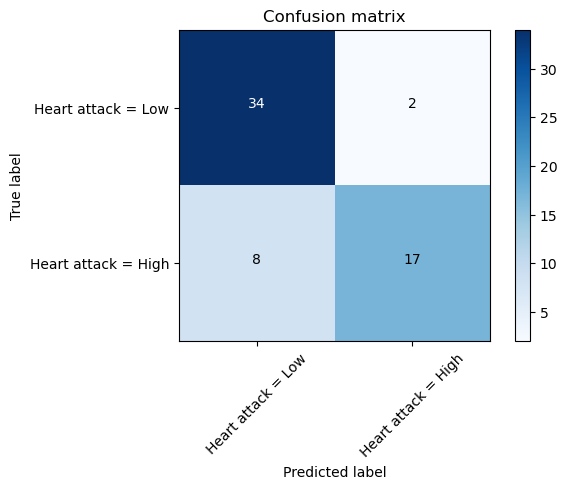

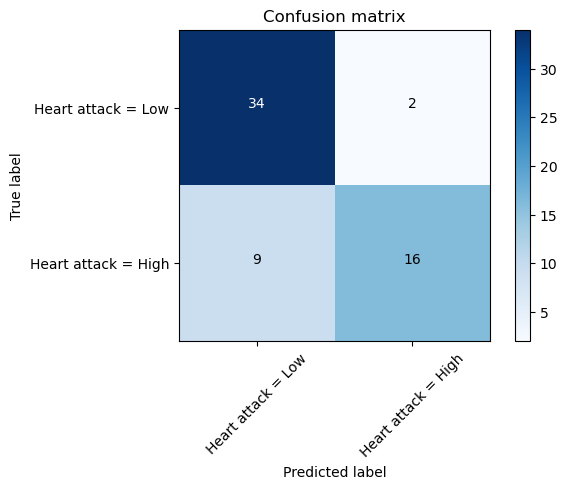

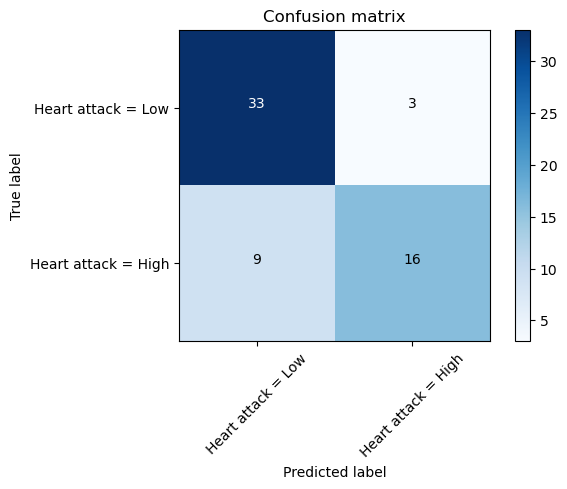

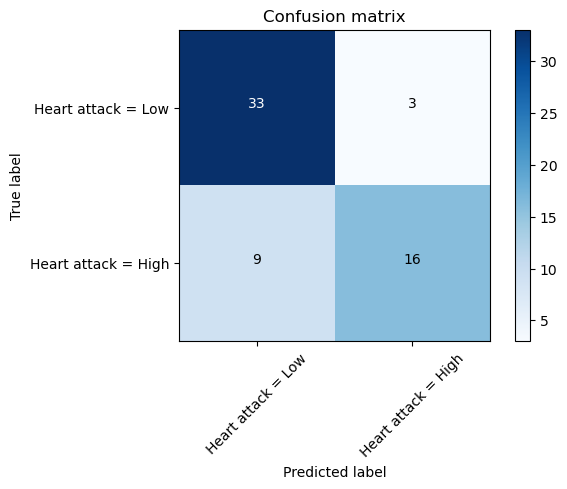

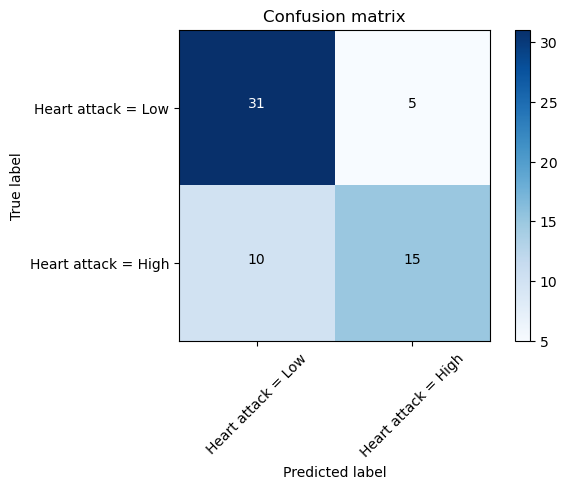

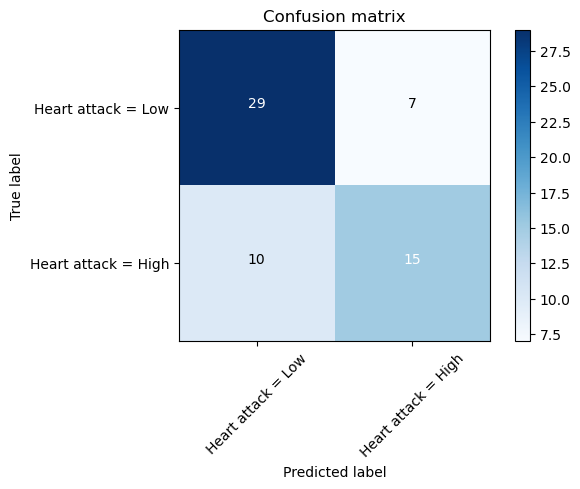

In [71]:
from sklearn.linear_model import LogisticRegression
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
for solver in solvers:
    LR = LogisticRegression(C = 0.01, solver = solver)
    # Train
    LR.fit(X_train, Y_train)
    #print(LR)
    # Predict
    yhat = LR.predict(X_test)
    print(yhat[0:5])
    yhat_prob = LR.predict_proba(X_test)
    #print(yhat_prob)
    # The firs column is P(yaht = 0|X) and the second column is P(yaht = 1|X)

    #Compute confusion matrix
    print('Solver method:', solver)
    cnf_matrix = confusion_matrix(Y_test, yhat, labels = [1,0])
    np.set_printoptions(precision=2)
    print (classification_report(Y_test, yhat))
    print('Jaccard Score is:',jaccard_score(Y_test, yhat, pos_label = 0))
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Heart attack = Low','Heart attack = High'],normalize= False,  title='Confusion matrix')

As you can see the best result appears when our solver method between lbfgs, liblinear, newton-cg, newton-cholesky, sag, saga is lbfgs in Logistic Regression .